# <span style="color:lightblue">DATA SCIENCE AND MACHINE LEARNING INTERNSHIP PROGRAM</span>

<h2><center><u>Assignment_5</u></center><h2>

In [3]:
#Importing the useful Libraries


#dataFrame manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("Display.max_columns", None)
pd.set_option("Display.max_rows", None)


#Algorithm and scikit learn libraries
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA

## <span style="color:lightblue">**Problem Statement  1:**</span>
Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:
1. Create a seperate DataFrame with only numeric data by remove the "country" column
2. Scale the data using the Standard Scaler to create a scaled DataFrame
3. Plotting dendograms with the complete linkage method
4. Creating cluster labels using cut tree
5. Perfom the 4-Component PCA on DataFrame
6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

In [4]:
country_df = pd.read_csv("./../Assignment_files/Assignment5/Country-data.csv")
print(f'the shape of the country_df is: {country_df.shape}')
country_df.head()

the shape of the country_df is: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
#Task1 Creating a seperate DataFrame with only numeric data (removed the country column)
numeric_country_df = country_df.drop("country", axis=1)
numeric_country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
#Task2: Scaling the dataFrame to create a scaled DataFrame
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(numeric_country_df.to_numpy())
scaled_df = pd.DataFrame(scaled_df, columns=numeric_country_df.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


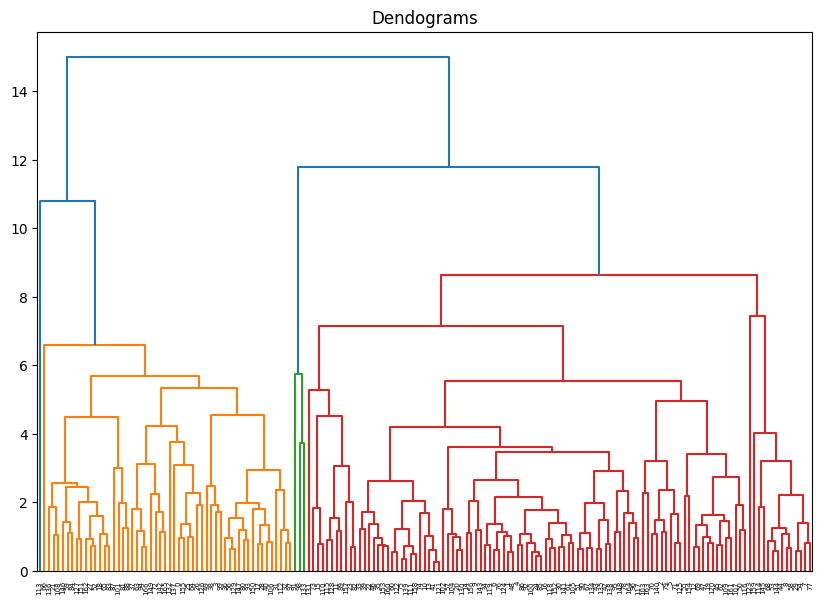

In [8]:
#Task# plotting dendograms with complete linkage method
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_df, method="complete"), orientation='top')

In [10]:
num_clusters = 4
cut_tree = shc.cut_tree(shc.linkage(scaled_df, method="complete"), n_clusters=num_clusters).flatten()

In [11]:
pca = PCA(n_components=4)
copy = scaled_df.copy()
# copy.drop("Hierarchical_Cluster_labels", axis=1)
principalComponents = pca.fit_transform(copy)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
principalDf.head()

pca_df = principalDf
pca_df["Hierarchical_Cluster_Labels"] = cut_tree
pca_df.head()

,PC1,PC2,PC3,PC4,Hierarchical_Cluster_Labels
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,1
2,-0.285225,-0.455174,1.221505,-0.868115,1
3,-2.932423,1.695555,1.525044,0.839625,0
4,1.033576,0.136659,-0.225721,-0.847063,1


In [12]:
final_df = pd.concat([pca_df, country_df[['country', 'gdpp', 'child_mort']]], axis=1)
final_df.head()

,PC1,PC2,PC3,PC4,Hierarchical_Cluster_Labels,country,gdpp,child_mort
0,-2.913025,0.095621,-0.718118,1.005255,0,Afghanistan,553,90.2
1,0.429911,-0.588156,-0.333486,-1.161059,1,Albania,4090,16.6
2,-0.285225,-0.455174,1.221505,-0.868115,1,Algeria,4460,27.3
3,-2.932423,1.695555,1.525044,0.839625,0,Angola,3530,119.0
4,1.033576,0.136659,-0.225721,-0.847063,1,Antigua and Barbuda,12200,10.3


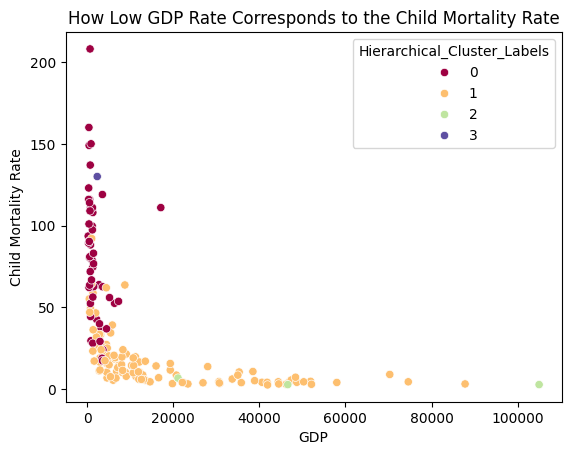

In [14]:
# sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster_Labels', data=final_df)
sns.scatterplot(x='gdpp', y='child_mort', hue='Hierarchical_Cluster_Labels', data=final_df, palette='Spectral')
plt.title('How Low GDP Rate Corresponds to the Child Mortality Rate');
# plt.legend().set_title("Hierachical_Cluster_labels");
plt.ylabel("Child Mortality Rate")
plt.xlabel("GDP");

Obviously the child mortality rate would be higher if the GDP rate is smaller

## <span style="color:lightblue"> **Problem Statement 2:**</span>
Write a Python program that reads the "Credit Card Customer Data.csv". The following are the tasks that need to be taken into consideration while constructing the solution to Segregate customers based on the data provided with the help of k-means clustering.

**Task to be performed:**
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best size of the cluster and build the final model
8. Observe Cluster behavior with different columns
9. Print Co-ordinates of all centroid and silhouette scores for the final model

In [19]:
#Task 1: Loading the csv file into a dataframe
credit_card_df = pd.read_csv("./../Assignment_files/Assignment5/Credit Card Customer Data.csv")
credit_card_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [20]:
#Task 2 finding the missing values
credit_card_df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [21]:
#checking for duplicated values also
credit_card_df.duplicated().sum()

0

In [22]:
#Dropping the unnecessary column: in this case the Sl_No column and the customer key
credit_card_df.drop(columns=["Sl_No", "Customer Key"], axis=1, inplace=True)
credit_card_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [23]:
#Task3: Univariate
credit_card_df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [24]:
credit_card_df.shape

(660, 5)

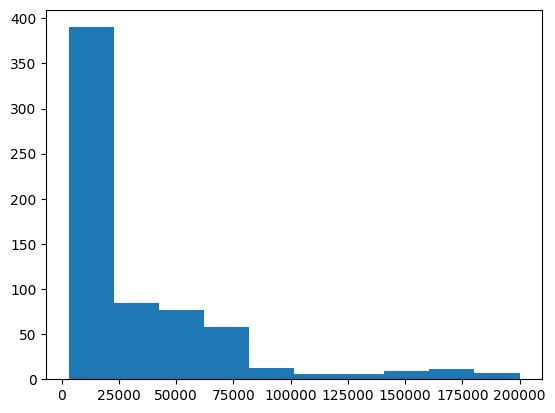

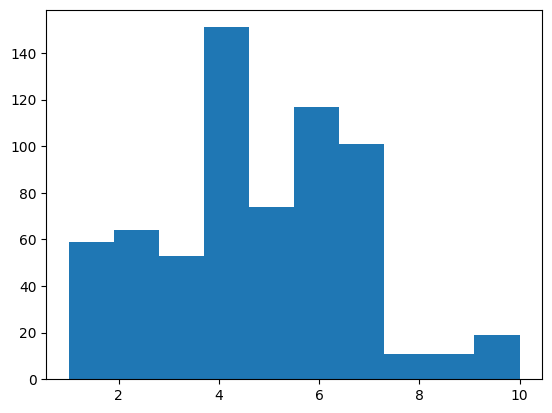

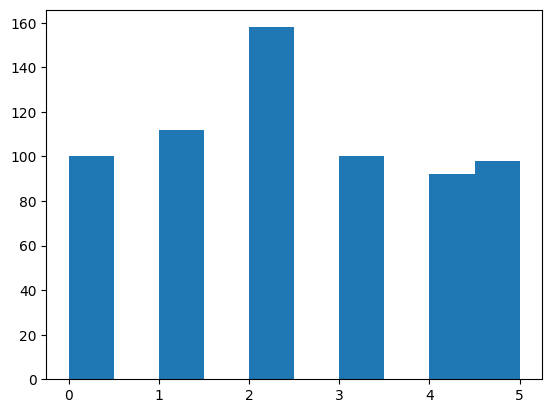

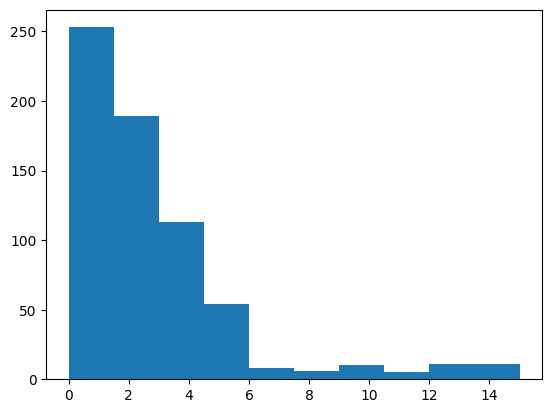

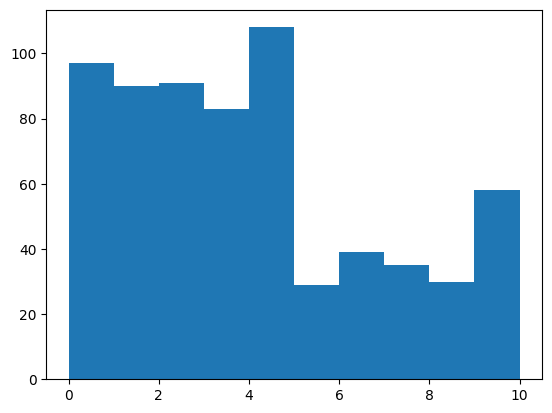

In [25]:
#check for hist distribution
for column in credit_card_df.columns:
    fig, ax = plt.subplots()
    plt.hist(credit_card_df[column])

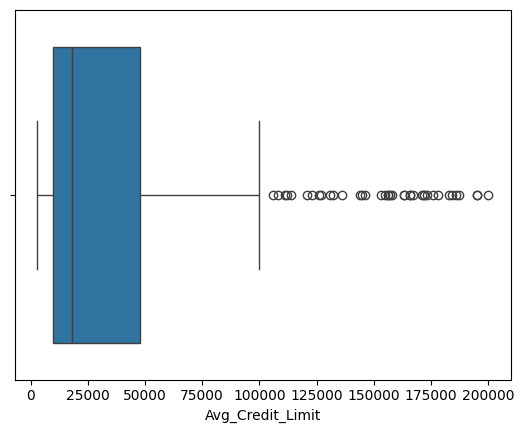

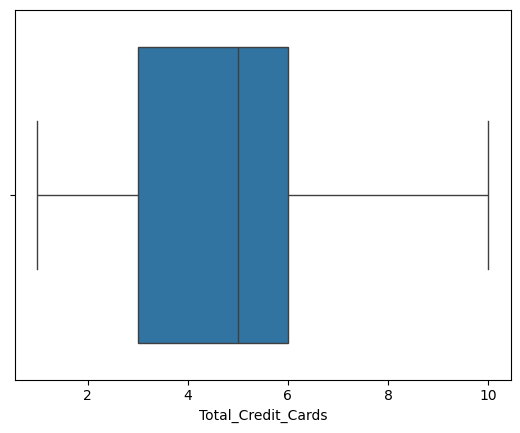

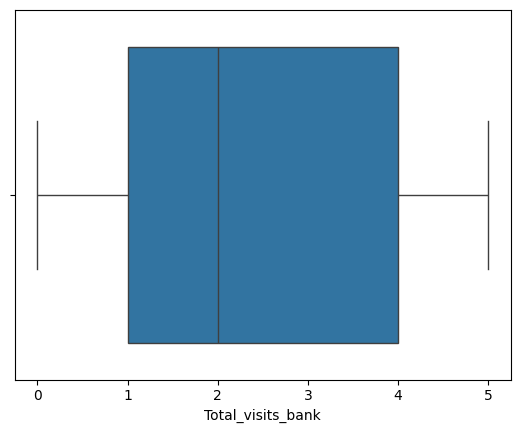

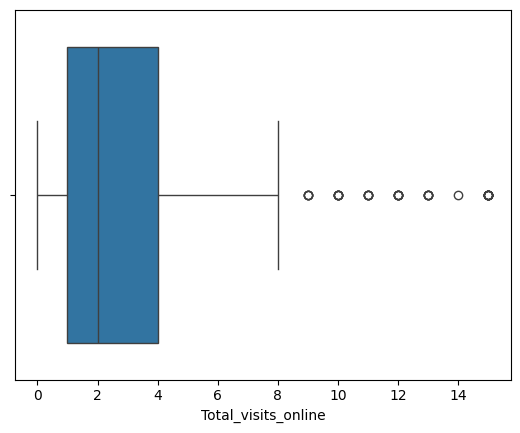

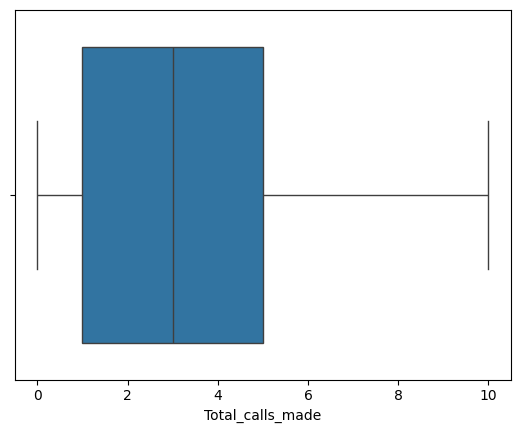

In [26]:
#check for outliers
for column in credit_card_df.columns:
    fig, ax = plt.subplots()
    sns.boxplot(credit_card_df[column], orient="h")

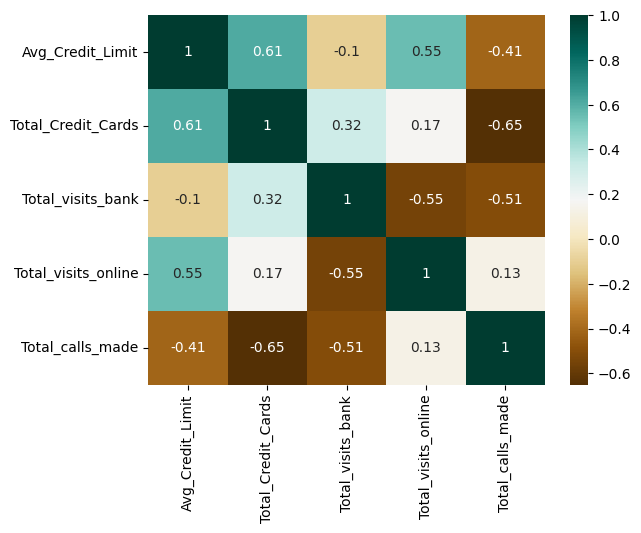

In [27]:
#Task3: Bivariate analysis
fig, ax = plt.subplots()

sns.heatmap(credit_card_df.corr(), ax=ax, annot=True, cmap='BrBG');

In [28]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(credit_card_df.to_numpy())
scaled_df = pd.DataFrame(scaled_df, columns=credit_card_df.columns)
scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


In [29]:
#Task 5: Finding the within-cluster sum of square
wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss_list.append(kmeans.inertia_)

#Task6
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    cluster_label = kmeans.labels_
    score = silhouette_score(scaled_df, cluster_label)
    # print(f'the silhoutte score is {score}')
    silhouette_scores.append(score);

Text(0.5, 1.0, 'Finding the number of Clusters using the WCSS-the elbow method')

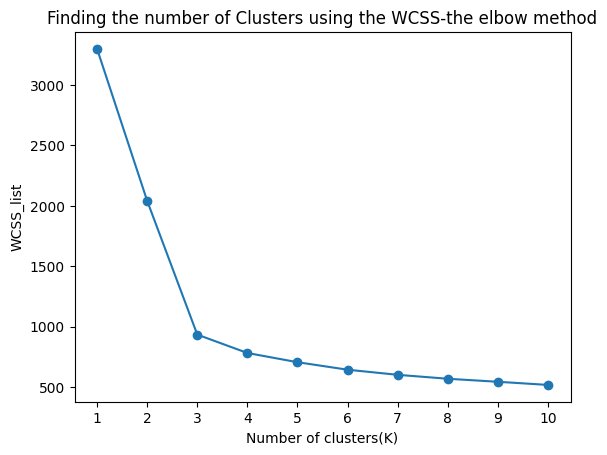

In [30]:
#Task 7: using matplotlib to find the best score for the different sizes of K.
plt.plot(range(1, 11), wcss_list, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS_list')
plt.title("Finding the number of Clusters using the WCSS-the elbow method")

from observing the elbow curve the best number of clusters that can be create would be 3

Text(0.5, 1.0, 'Finding the number of Clusters using silhouette score analysis')

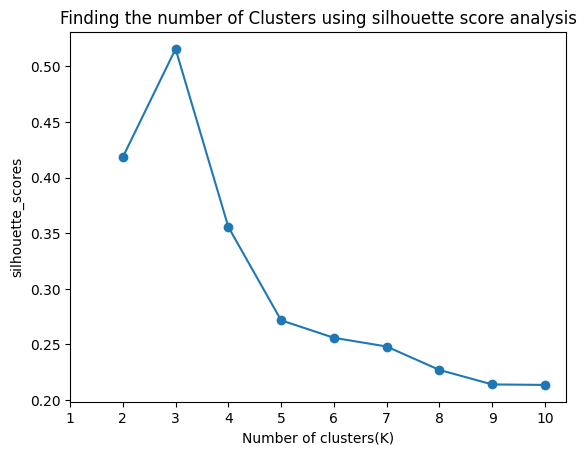

In [31]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters(K)')
plt.ylabel('silhouette_scores')
plt.title("Finding the number of Clusters using silhouette score analysis")

From the fig, the silhouette score peeks at n_clusters == 3

In [32]:
best_k = 3
final_model = KMeans(n_clusters=best_k, random_state=42)
final_model.fit(scaled_df)
clusters = final_model.predict(scaled_df)
cluster_df = pd.DataFrame(clusters, columns=["cluster"])
cluster_df = pd.concat([scaled_df, cluster_df], axis=1)
cluster_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2


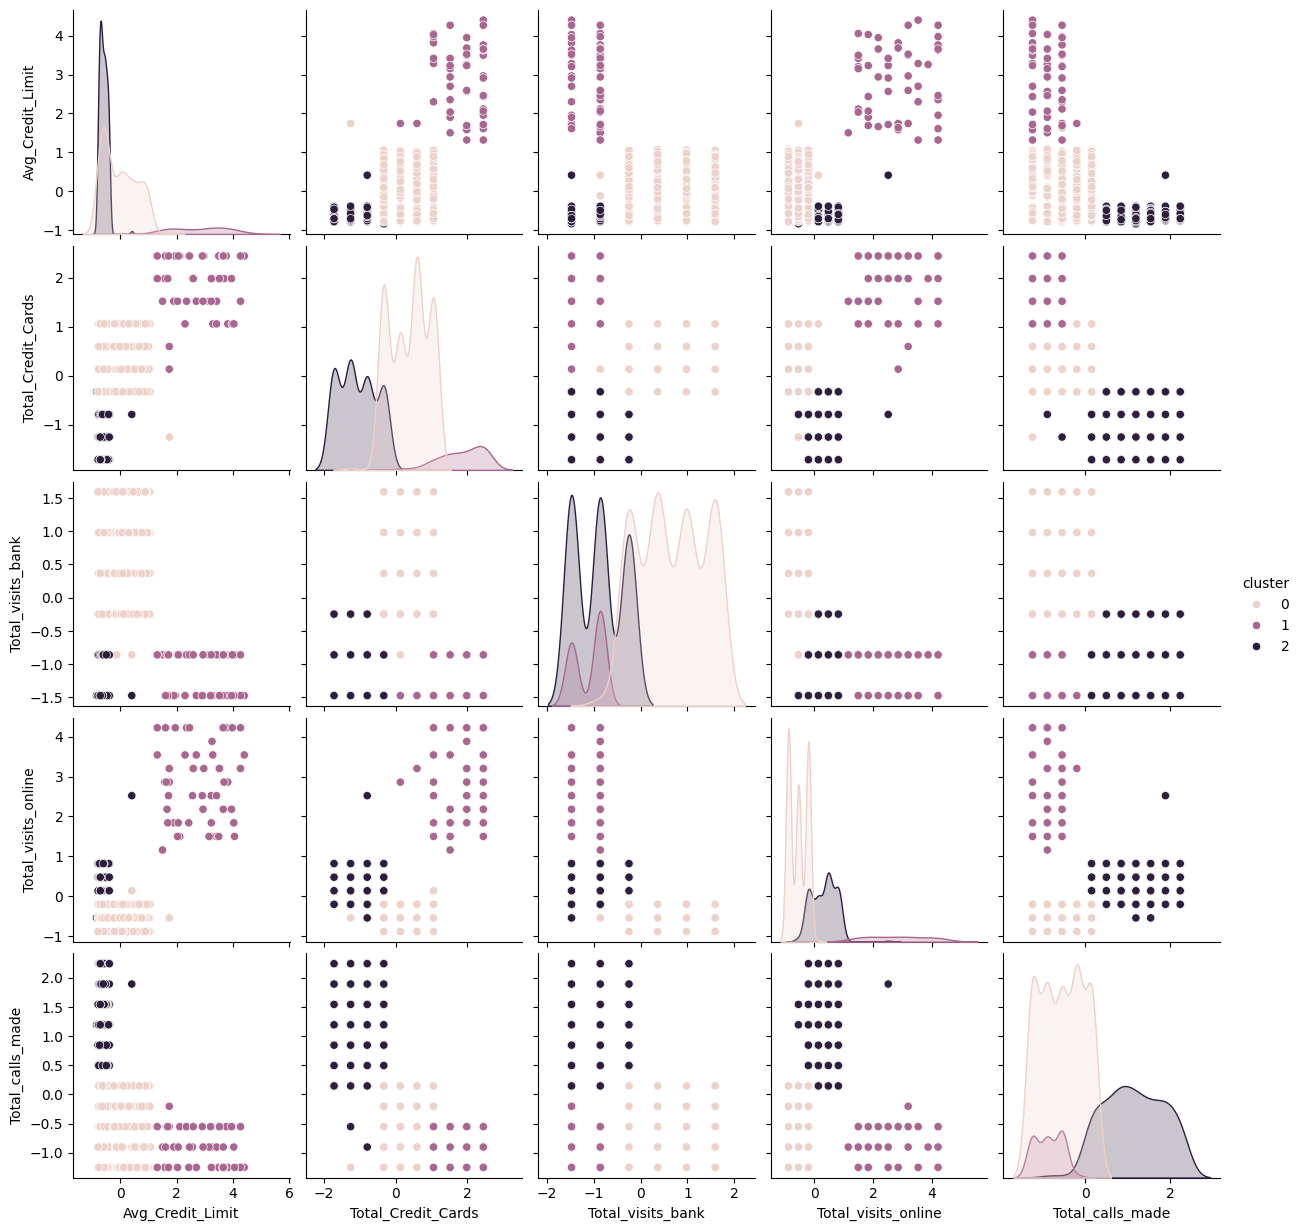

In [33]:
#Task 8: Observe CLuster behavior with different columns
sns.pairplot(cluster_df, hue='cluster');

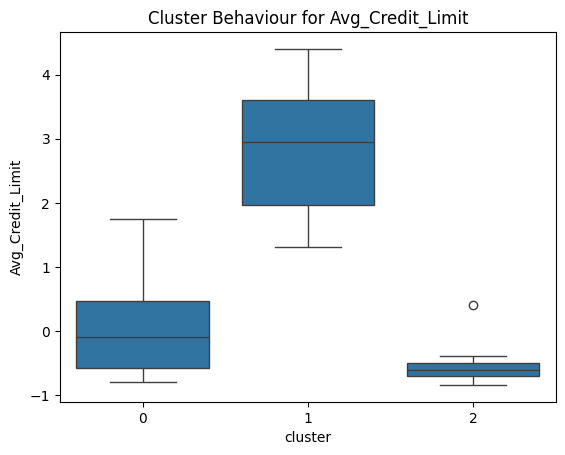

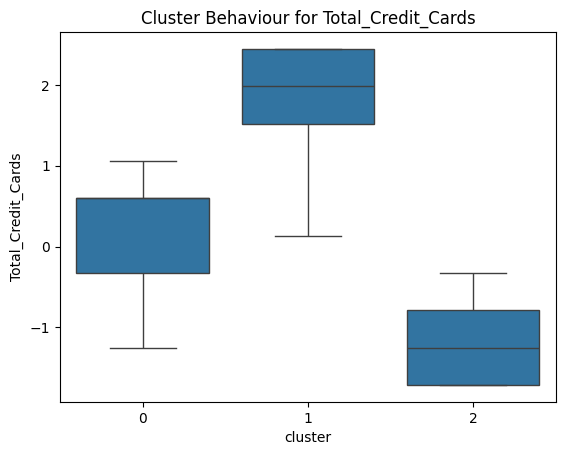

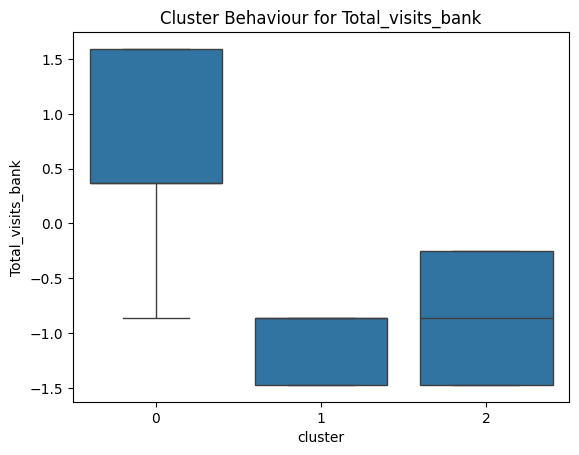

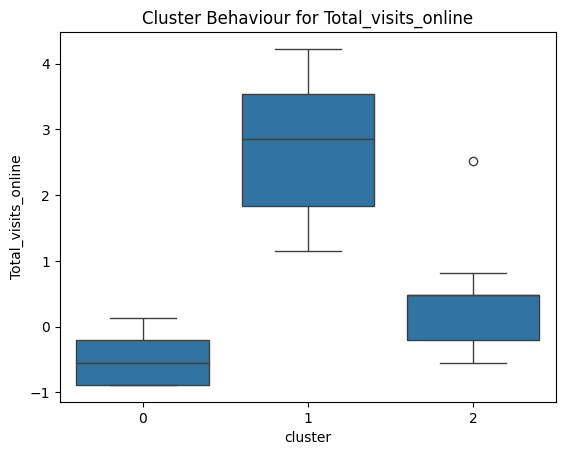

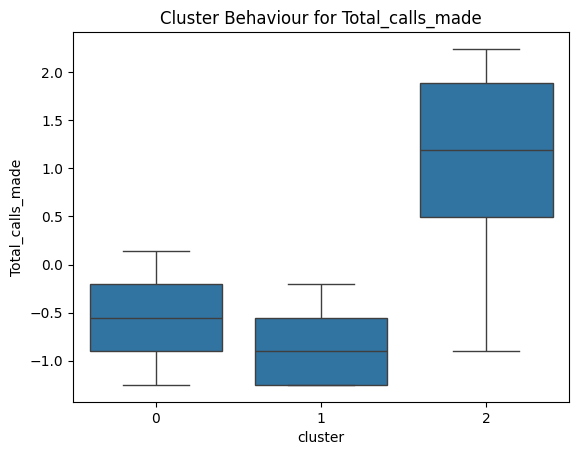

In [34]:
for column in cluster_df.columns:
    if column != 'cluster':
        sns.boxplot(x='cluster', y=column, data=cluster_df)
        plt.title(f'Cluster Behaviour for {column}')
        plt.show()

In [35]:
#Task 9: Printing co-ordinates of all centroids and silhouette scores for the final model
centroids = final_model.cluster_centers_
original_centroids = std_scaler.inverse_transform(centroids) #check out the centroids
original_centroids 
centroids

array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882]])

In [36]:
print("\nSilhouette Score for the Final Model:", silhouette_score(scaled_df, cluster_df['cluster']))


Silhouette Score for the Final Model: 0.5157182558881063


## <span style="color:lightblue">**Problem Statement 3:**</span> **DBSCAN Clustering**
Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following task:
1. Find the correlation among the all the columns and drop the column/s with the least correlation
2. Encode the "Gender" column using get_dummies() function
3. Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4
4. Print the size of each cluster and also the size of outliers' cluster
5. Using a scatter plot shows how annual income corresponds to the spending rates of customers

## <span style="color:lightblue">**Problem Statement 4:**</span>
Write a python program that reads the Groceries data.csv file into a DataFrame. The following are the tasks that need to be taken into consideration while constructing the solution to using the apriori algorithm and list out items that are sold most frequently with other items. Dataset file contains tabular data, where it has items, date, member number, day of the month, day of the week, etc.
**Tasks to be performed:**
1. Install mlxtend library for futher process
2. Load the Groceries data.csv data into a Data frame
3. Print customer data where the member number is 1001
4. Create a new column as "item count", and give the count as 1 (because all customers bought 1 item on each day only)
5. Drop unnecessary columns lik "month", "day", "year", "day_of_week"
6. Create a new data frame where all data is grouped by member id and items they bought and set their value as itme count
7. Use the Apriori algorithm and generate frequent itemsets that have the support of at least 7%
8. Generating the rules with their corresponding support, confidence , and lift
9. Filtering out the values with lift >= 1 and confidemce >= 0.5